Import the Libraries

In [2]:
import pm4py
import pandas as pd
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier as snapForest
from sklearn.tree import DecisionTreeClassifier as decisionTree
from sklearn.neural_network import MLPClassifier
from sklearn.tree import plot_tree
from sklearn.linear_model import LogisticRegression as logistR
import matplotlib.pyplot as plt
from sklearn import set_config
from sklearn.metrics import confusion_matrix, roc_curve, RocCurveDisplay,ConfusionMatrixDisplay, RocCurveDisplay
import seaborn as sb
from ydata_profiling import ProfileReport
%matplotlib inline
import matplotlib
from matplotlib import pyplot as plt
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, classification_report, ConfusionMatrixDisplay, auc
from sklearn.svm import SVC

In [3]:
data = df_data_1 = pm4py.read_xes("BPI_Challenge_2019.xes")
df_data_1.head()

parsing log, completed traces ::   0%|          | 0/251734 [00:00<?, ?it/s]

,User,org:resource,concept:name,Cumulative net worth (EUR),time:timestamp,case:Spend area text,case:Company,case:Document Type,case:Sub spend area text,case:Purchasing Document,...,case:Vendor,case:Item Type,case:Item Category,case:Spend classification text,case:Source,case:Name,case:GR-Based Inv. Verif.,case:Item,case:concept:name,case:Goods Receipt
0,batch_00,batch_00,SRM: Created,298.0,2018-01-02 12:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
1,batch_00,batch_00,SRM: Complete,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
2,batch_00,batch_00,SRM: Awaiting Approval,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
3,batch_00,batch_00,SRM: Document Completed,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True
4,batch_00,batch_00,SRM: In Transfer to Execution Syst.,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,vendorID_0000,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True


In [4]:
db = df_data_1.groupby("case:concept:name").apply(
    lambda group: group.assign(iteration=group.groupby('concept:name').cumcount() + 1)
).reset_index(drop=True)

C:\Users\maltu\AppData\Local\Temp\ipykernel_23792\3462261065.py:1: FutureWarning: Not prepending group keys to the result index of transform-like apply. In the future, the group keys will be included in the index, regardless of whether the applied function returns a like-indexed object.
To preserve the previous behavior, use

	>>> .groupby(..., group_keys=False)

To adopt the future behavior and silence this warning, use 

	>>> .groupby(..., group_keys=True)
  db = df_data_1.groupby("case:concept:name").apply(


In [5]:
db.head()

,User,org:resource,concept:name,Cumulative net worth (EUR),time:timestamp,case:Spend area text,case:Company,case:Document Type,case:Sub spend area text,case:Purchasing Document,...,case:Item Type,case:Item Category,case:Spend classification text,case:Source,case:Name,case:GR-Based Inv. Verif.,case:Item,case:concept:name,case:Goods Receipt,iteration
0,batch_00,batch_00,SRM: Created,298.0,2018-01-02 12:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1
1,batch_00,batch_00,SRM: Complete,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1
2,batch_00,batch_00,SRM: Awaiting Approval,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1
3,batch_00,batch_00,SRM: Document Completed,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1
4,batch_00,batch_00,SRM: In Transfer to Execution Syst.,298.0,2018-01-02 13:53:00+00:00,CAPEX & SOCS,companyID_0000,EC Purchase order,Facility Management,2000000000,...,Standard,"3-way match, invoice before GR",NPR,sourceSystemID_0000,vendor_0000,False,00001,2000000000_00001,True,1


In [6]:
db.isnull().any()

User                              False
org:resource                      False
concept:name                      False
Cumulative net worth (EUR)        False
time:timestamp                    False
case:Spend area text              False
case:Company                      False
case:Document Type                False
case:Sub spend area text          False
case:Purchasing Document          False
case:Purch. Doc. Category name    False
case:Vendor                       False
case:Item Type                    False
case:Item Category                False
case:Spend classification text    False
case:Source                       False
case:Name                         False
case:GR-Based Inv. Verif.         False
case:Item                         False
case:concept:name                 False
case:Goods Receipt                False
iteration                         False
dtype: bool

In [7]:
set_config(display='diagram')

In [8]:
high = db['case:concept:name'].value_counts()
df = pd.DataFrame({    
    'app': high.index,
    'values': high.values
},index=range(0,len(high)))
df

,app,values
0,4507027474_00010,990
1,4507000440_00010,923
2,4507004396_00020,868
3,4507000647_00010,833
4,4507001973_00010,745
...,...,...
251729,4508075459_00870,1
251730,4508075459_00880,1
251731,4508075459_00890,1
251732,4508075459_00900,1


In [9]:
h = np.where(df['values']>26)
lowest = df.iloc[(np.where(df['values']<26))]
highest= df.iloc[h]
print(lowest)
print(highest)

                     app  values
2449    4508065041_00001      25
2450    4508046094_00001      25
2451    4507008308_00080      25
2452    4508072828_00001      25
2453    4507031799_00001      25
...                  ...     ...
251729  4508075459_00870       1
251730  4508075459_00880       1
251731  4508075459_00890       1
251732  4508075459_00900       1
251733  4508075455_00430       1

[249285 rows x 2 columns]
                   app  values
0     4507027474_00010     990
1     4507000440_00010     923
2     4507004396_00020     868
3     4507000647_00010     833
4     4507001973_00010     745
...                ...     ...
2356  4507038063_00001      27
2357  2000013669_00001      27
2358  4508067431_00001      27
2359  4507039821_00001      27
2360  4508073417_00001      27

[2361 rows x 2 columns]


In [10]:
db.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1595923 entries, 0 to 1595922
Data columns (total 22 columns):
 #   Column                          Non-Null Count    Dtype              
---  ------                          --------------    -----              
 0   User                            1595923 non-null  object             
 1   org:resource                    1595923 non-null  object             
 2   concept:name                    1595923 non-null  object             
 3   Cumulative net worth (EUR)      1595923 non-null  float64            
 4   time:timestamp                  1595923 non-null  datetime64[ns, UTC]
 5   case:Spend area text            1595923 non-null  object             
 6   case:Company                    1595923 non-null  object             
 7   case:Document Type              1595923 non-null  object             
 8   case:Sub spend area text        1595923 non-null  object             
 9   case:Purchasing Document        1595923 non-null  object 

In [11]:
# profile = ProfileReport(db, explorative=True)
# profile

In [12]:
pro_df = db.drop(columns=['case:Purch. Doc. Category name', 'case:Source','User', 'case:Vendor', 'time:timestamp'])

In [13]:
# profile = ProfileReport(pro_df, explorative=True)
# profile

C:\Users\maltu\AppData\Local\Temp\ipykernel_23792\232747675.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  dataplot = sb.heatmap(pro_df.corr(), vmin=-1, vmax=1, annot=True)


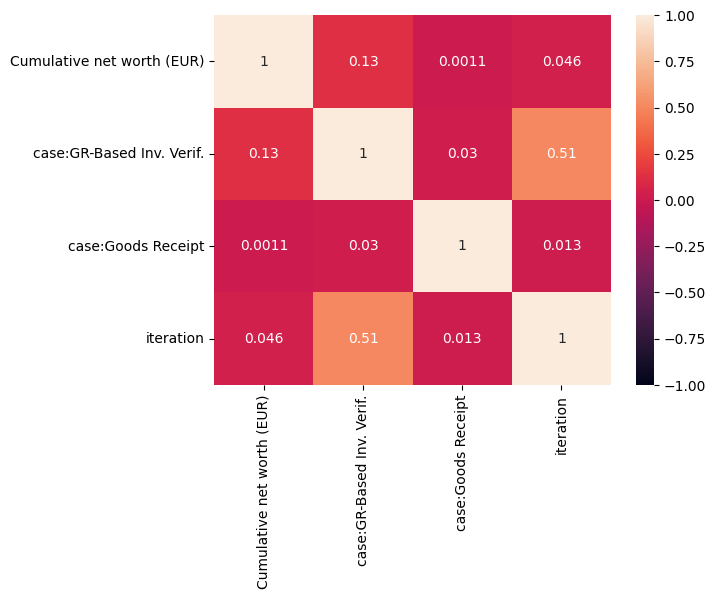

In [14]:
dataplot = sb.heatmap(pro_df.corr(), vmin=-1, vmax=1, annot=True)

In [15]:
selected = ["iteration", "Cumulative net worth (EUR)", "case:Item", "concept:name", "case:Spend area text", "case:Item Type", "case:Item Category", "case:Spend classification text", "case:GR-Based Inv. Verif."]
sel_df = pro_df[selected]

In [16]:
target = np.where(db["iteration"]>=3,1,0)

Pipeline

In [17]:
categorical_cols = sel_df.columns.where(sel_df.dtypes == object)
onehotcols = []
for c in categorical_cols:
    if type(c) == str:
        onehotcols.append(c)
for i in onehotcols:
    sel_df[i] = pd.Categorical(sel_df[i])
    sel_df[i] = sel_df[i].cat.codes


C:\Users\maltu\AppData\Local\Temp\ipykernel_23792\2612448015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df[i] = pd.Categorical(sel_df[i])
C:\Users\maltu\AppData\Local\Temp\ipykernel_23792\2612448015.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  sel_df[i] = sel_df[i].cat.codes
C:\Users\maltu\AppData\Local\Temp\ipykernel_23792\2612448015.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead



<Axes: >

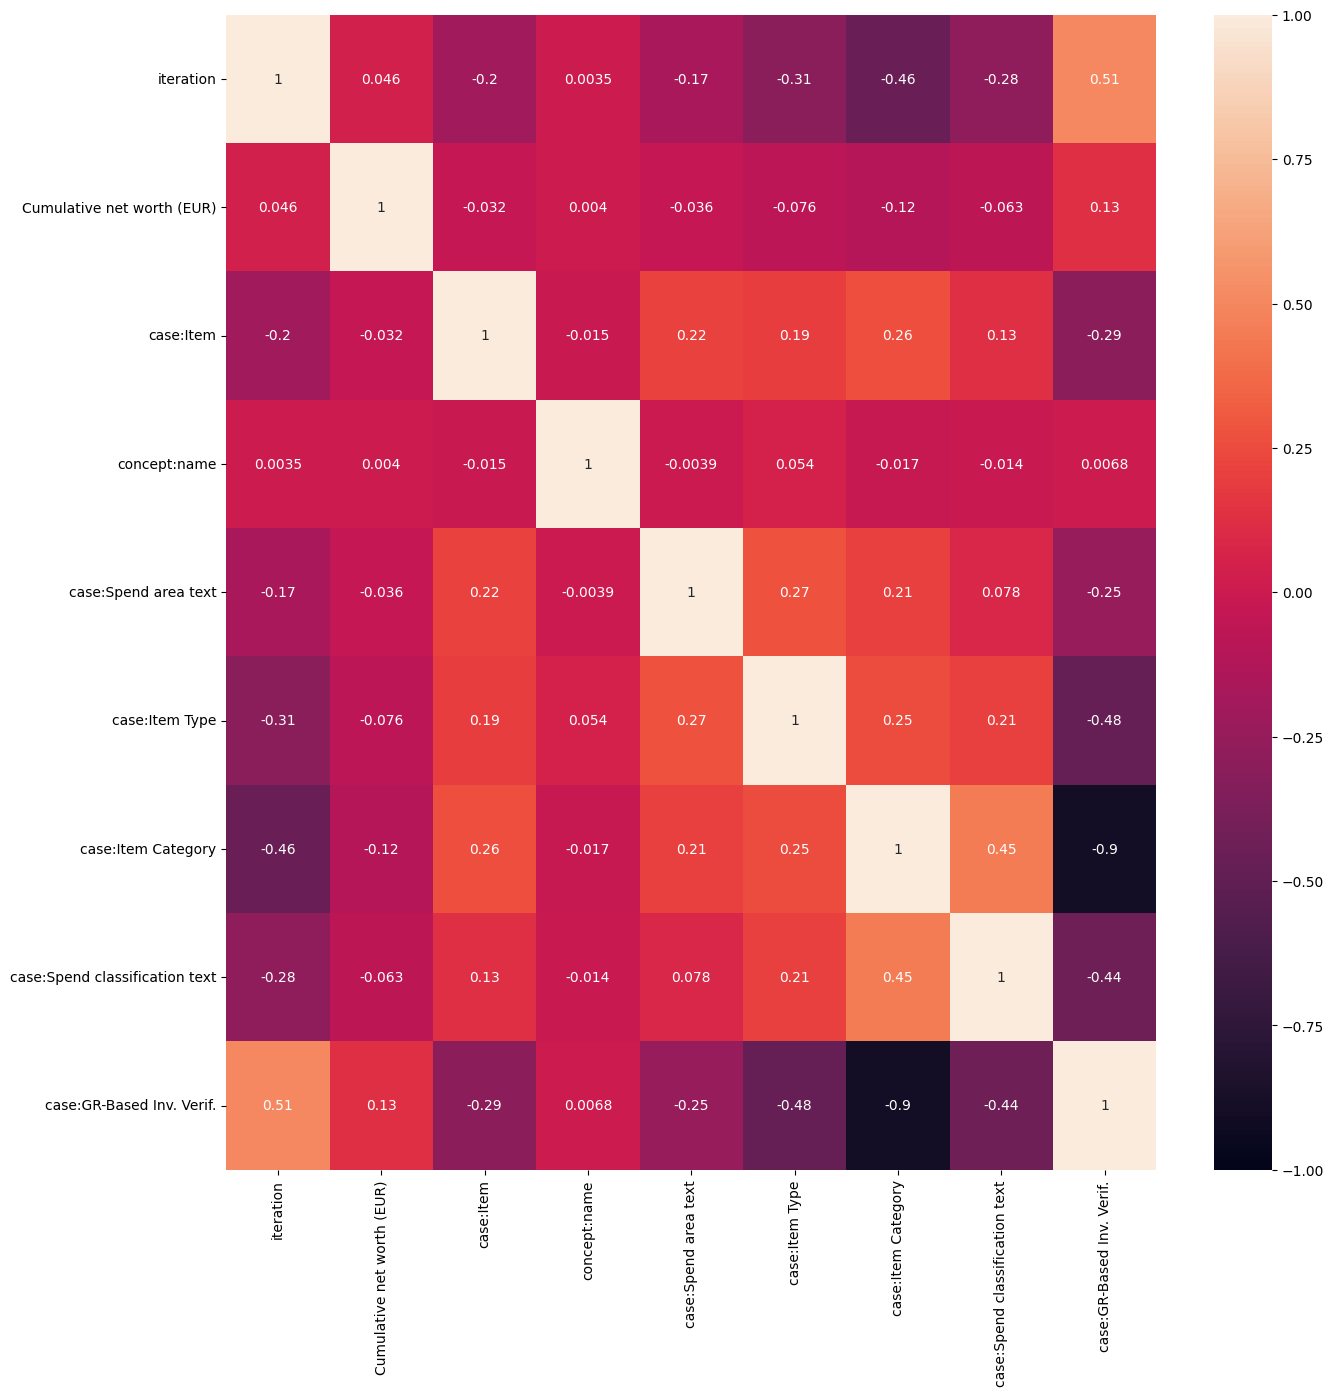

In [18]:
corr = sel_df.corr()
plt.figure(figsize=(15,15))
sb.heatmap(corr,annot=True, vmin=-1, vmax=1)

In [19]:
oneHot = OneHotEncoder(handle_unknown='ignore')
preprocessing = ColumnTransformer([
    ('OneHot_cat', oneHot, onehotcols)
])
rf = Pipeline([
    ('prepocess', preprocessing),
    ('classifier', snapForest(n_estimators=200))
])
dt = Pipeline([
        ('prepocess', preprocessing),
        ('classifier', decisionTree())
])
lr = Pipeline([
        ('prepocess', preprocessing),
        ('classifier', logistR(random_state=0, max_iter = 300))
])
mlp = Pipeline([
        ('prepocess', preprocessing),
        ('classifier', MLPClassifier(random_state=1, max_iter=300))
])

In [53]:
svc = Pipeline([
        ('prepocess', preprocessing),
        ('classifier', SVC(random_state=1, max_iter = 300))
])

In [21]:
xtrain,xtest,ytrain,ytest = train_test_split(sel_df,target, train_size=0.8, shuffle=False)

In [22]:
xtrain.shape

(1276738, 9)

In [23]:
ytrain.shape

(1276738,)

In [24]:
rf.fit(xtrain, ytrain)

Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('OneHot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['case:Item', 'concept:name',
                                                   'case:Spend area text',
                                                   'case:Item Type',
                                                   'case:Item Category',
                                                   'case:Spend classification '
                                                   'text'])])),
                ('classifier', RandomForestClassifier(n_estimators=200))])

In [25]:
dt.fit(xtrain, ytrain)

Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('OneHot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['case:Item', 'concept:name',
                                                   'case:Spend area text',
                                                   'case:Item Type',
                                                   'case:Item Category',
                                                   'case:Spend classification '
                                                   'text'])])),
                ('classifier', DecisionTreeClassifier())])

In [26]:
lr.fit(xtrain, ytrain)

c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('OneHot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['case:Item', 'concept:name',
                                                   'case:Spend area text',
                                                   'case:Item Type',
                                                   'case:Item Category',
                                                   'case:Spend classification '
                                                   'text'])])),
                ('classifier',
                 LogisticRegression(max_iter=300, random_state=0))])

In [27]:
mlp.fit(xtrain,ytrain)

Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('OneHot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['case:Item', 'concept:name',
                                                   'case:Spend area text',
                                                   'case:Item Type',
                                                   'case:Item Category',
                                                   'case:Spend classification '
                                                   'text'])])),
                ('classifier', MLPClassifier(max_iter=300, random_state=1))])

In [54]:
svc.fit(xtrain,ytrain)

c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(


Pipeline(steps=[('prepocess',
                 ColumnTransformer(transformers=[('OneHot_cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['case:Item', 'concept:name',
                                                   'case:Spend area text',
                                                   'case:Item Type',
                                                   'case:Item Category',
                                                   'case:Spend classification '
                                                   'text'])])),
                ('classifier', SVC(max_iter=300, random_state=1))])

Prediction

In [29]:
xtest.nunique()

iteration                           308
Cumulative net worth (EUR)        11110
case:Item                           430
concept:name                         28
case:Spend area text                 20
case:Item Type                        6
case:Item Category                    4
case:Spend classification text        4
case:GR-Based Inv. Verif.             2
dtype: int64

In [30]:
print("LR score: ", lr.score(xtrain,ytrain))
print("RF score: ", rf.score(xtrain,ytrain))
print("DT score: ", dt.score(xtrain,ytrain))
print("MLP score: ", mlp.score(xtrain,ytrain))

LR score:  0.9736453367879706
RF score:  0.976476771271788
DT score:  0.976476771271788
MLP score:  0.9764141115874988


In [55]:
print("SVC score: ", svc.score(xtrain,ytrain))

SVC score:  0.8414600333036222


In [32]:
lr_pred = lr.predict(xtest)
rf_pred = rf.predict(xtest)
dt_pred = dt.predict(xtest)
mlp_pred = mlp.predict(xtest)

In [56]:
svc_pred = svc.predict(xtest)

Display the results

In [34]:
print("LR:")
print(classification_report(ytest,lr_pred))
print("RF:")
print(classification_report(ytest,rf_pred))
print("DT:")
print(classification_report(ytest,dt_pred))
print("MLP:")
print(classification_report(ytest,mlp_pred))

LR:
              precision    recall  f1-score   support

           0       0.99      0.98      0.98    277241
           1       0.86      0.92      0.89     41944

    accuracy                           0.97    319185
   macro avg       0.92      0.95      0.94    319185
weighted avg       0.97      0.97      0.97    319185

RF:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    277241
           1       0.90      0.90      0.90     41944

    accuracy                           0.97    319185
   macro avg       0.94      0.94      0.94    319185
weighted avg       0.97      0.97      0.97    319185

DT:
              precision    recall  f1-score   support

           0       0.98      0.98      0.98    277241
           1       0.90      0.90      0.90     41944

    accuracy                           0.97    319185
   macro avg       0.94      0.94      0.94    319185
weighted avg       0.97      0.97      0.97    319185

MLP:
  

In [57]:
print("SVC:")
print(classification_report(ytest,svc_pred))

SVC:
              precision    recall  f1-score   support

           0       0.87      1.00      0.93    277241
           1       0.00      0.00      0.00     41944

    accuracy                           0.87    319185
   macro avg       0.43      0.50      0.46    319185
weighted avg       0.75      0.87      0.81    319185



In [58]:
models = [
    ("Logistic Regression", lr),
    ("Random Forest", rf),
    ("Decision Tree", dt),
    ('MLP Classifier', mlp),
    ("SVC", svc)
]
results = []
names = []
seed = 7
scoring = 'accuracy'
for name, model in models:
    cv_results = model_selection.cross_val_score(model, xtrain, ytrain, cv=5, scoring=scoring)
    results.append(cv_results)
    names.append(name)
    msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
    print(msg)

c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\linear_model\_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/st

Logistic Regression: 0.972196 (0.007779)
Random Forest: 0.970516 (0.014447)
Decision Tree: 0.971543 (0.012229)
MLP Classifier: 0.971084 (0.013221)


c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users\maltu\AppData\Local\Programs\Python\Python311\Lib\site-packages\sklearn\svm\_base.py:299: ConvergenceWarning: Solver terminated early (max_iter=300).  Consider pre-processing your data with StandardScaler or MinMaxScaler.
  warnings.warn(
c:\Users

SVC: 0.793003 (0.039885)


In [37]:
def rocdisplay(prediction):
    cm = confusion_matrix(prediction, ytest)
    cm_display = ConfusionMatrixDisplay(cm).plot()

In [38]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

def make_confusion_matrix(cf,
                          group_names=None,
                          categories='auto',
                          count=True,
                          percent=True,
                          cbar=True,
                          xyticks=True,
                          xyplotlabels=True,
                          sum_stats=True,
                          figsize=None,
                          cmap='Blues',
                          title=None):
    '''
    This function will make a pretty plot of an sklearn Confusion Matrix cm using a Seaborn heatmap visualization.
    Arguments
    ---------
    cf:            confusion matrix to be passed in
    group_names:   List of strings that represent the labels row by row to be shown in each square.
    categories:    List of strings containing the categories to be displayed on the x,y axis. Default is 'auto'
    count:         If True, show the raw number in the confusion matrix. Default is True.
    normalize:     If True, show the proportions for each category. Default is True.
    cbar:          If True, show the color bar. The cbar values are based off the values in the confusion matrix.
                   Default is True.
    xyticks:       If True, show x and y ticks. Default is True.
    xyplotlabels:  If True, show 'True Label' and 'Predicted Label' on the figure. Default is True.
    sum_stats:     If True, display summary statistics below the figure. Default is True.
    figsize:       Tuple representing the figure size. Default will be the matplotlib rcParams value.
    cmap:          Colormap of the values displayed from matplotlib.pyplot.cm. Default is 'Blues'
                   See http://matplotlib.org/examples/color/colormaps_reference.html
                   
    title:         Title for the heatmap. Default is None.
    '''


    # CODE TO GENERATE TEXT INSIDE EACH SQUARE
    blanks = ['' for i in range(cf.size)]

    if group_names and len(group_names)==cf.size:
        group_labels = ["{}\n".format(value) for value in group_names]
    else:
        group_labels = blanks

    if count:
        group_counts = ["{0:0.0f}\n".format(value) for value in cf.flatten()]
    else:
        group_counts = blanks

    if percent:
        group_percentages = ["{0:.2%}".format(value) for value in cf.flatten()/np.sum(cf)]
    else:
        group_percentages = blanks

    box_labels = [f"{v1}{v2}{v3}".strip() for v1, v2, v3 in zip(group_labels,group_counts,group_percentages)]
    box_labels = np.asarray(box_labels).reshape(cf.shape[0],cf.shape[1])


    # CODE TO GENERATE SUMMARY STATISTICS & TEXT FOR SUMMARY STATS
    if sum_stats:
        #Accuracy is sum of diagonal divided by total observations
        accuracy  = np.trace(cf) / float(np.sum(cf))

        #if it is a binary confusion matrix, show some more stats
        if len(cf)==2:
            #Metrics for Binary Confusion Matrices
            #precision = cf[1,1] / sum(cf[:,1])
            #recall    = cf[1,1] / sum(cf[1,:])
            #f1_score  = 2*precision*recall / (precision + recall)
            stats_text = "\n\nAccuracy={:0.2%}".format(accuracy)
        else:
            stats_text = "\n\nAccuracy={:0.2%}".format(accuracy)
    else:
        stats_text = ""


    # SET FIGURE PARAMETERS ACCORDING TO OTHER ARGUMENTS
    if figsize==None:
        #Get default figure size if not set
        figsize = plt.rcParams.get('figure.figsize')

    if xyticks==False:
        #Do not show categories if xyticks is False
        categories=False


    # MAKE THE HEATMAP VISUALIZATION
    plt.figure(figsize=figsize)
    sns.heatmap(cf,annot=box_labels,fmt="",cmap=cmap,cbar=cbar,xticklabels=categories,yticklabels=categories)

    if xyplotlabels:
        plt.ylabel('True label')
        plt.xlabel('Predicted label' + stats_text)
    else:
        plt.xlabel(stats_text)
    
    if title:
        plt.title(title)

In [39]:
def confu(x):
    labels = ['True Neg','False Pos','False Neg','True Pos']
    make_confusion_matrix(confusion_matrix(x, ytest), 
                      group_names=labels,
                      cmap='viridis')

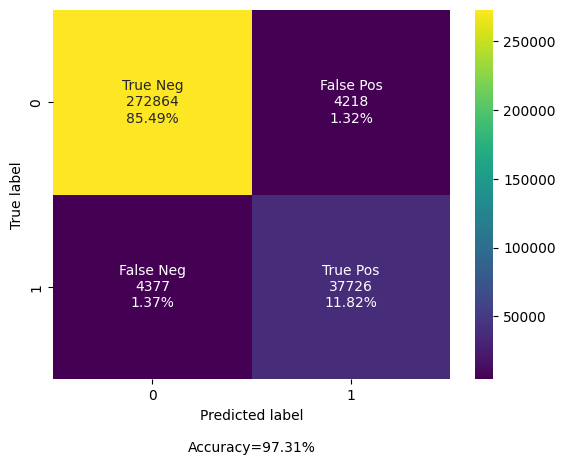

In [40]:
confu(rf_pred)

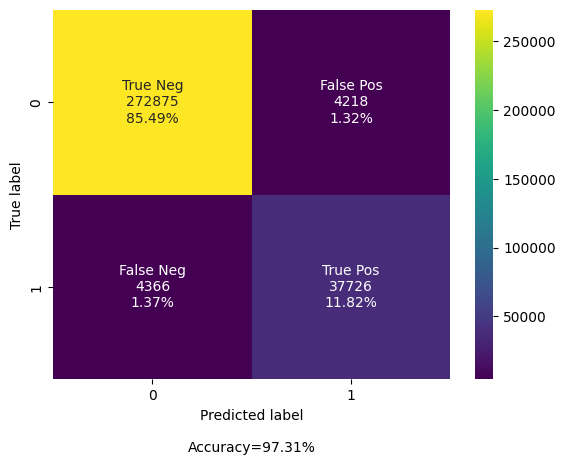

In [41]:
confu(dt_pred)

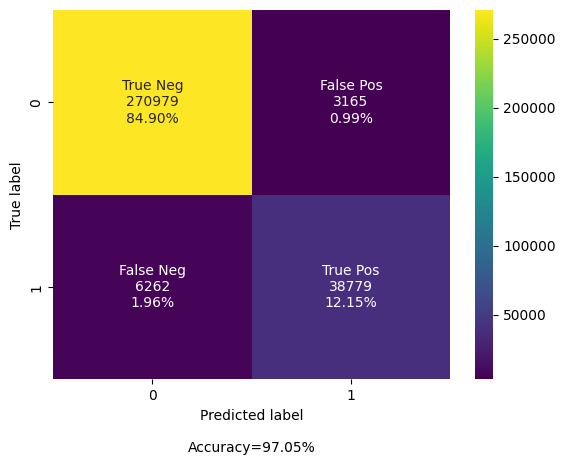

In [42]:
confu(lr_pred)

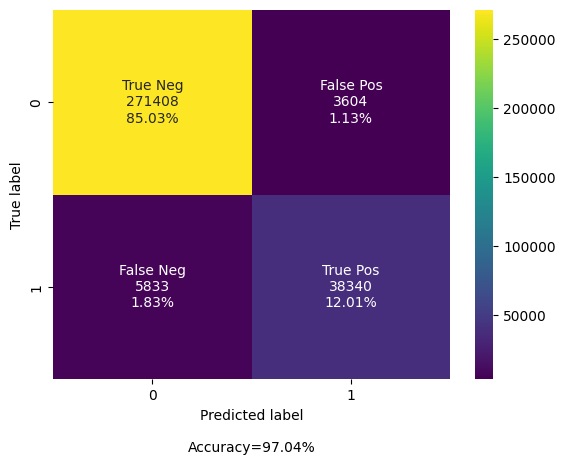

In [43]:
confu(mlp_pred)

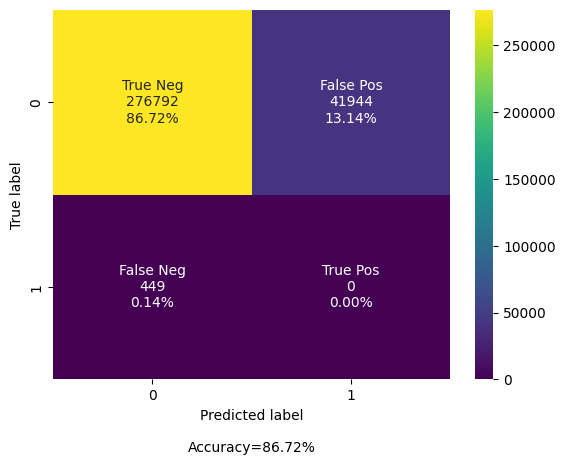

In [59]:
confu(svc_pred)

In [45]:
xtest.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 319185 entries, 1276738 to 1595922
Data columns (total 9 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   iteration                       319185 non-null  int64  
 1   Cumulative net worth (EUR)      319185 non-null  float64
 2   case:Item                       319185 non-null  int16  
 3   concept:name                    319185 non-null  int8   
 4   case:Spend area text            319185 non-null  int8   
 5   case:Item Type                  319185 non-null  int8   
 6   case:Item Category              319185 non-null  int8   
 7   case:Spend classification text  319185 non-null  int8   
 8   case:GR-Based Inv. Verif.       319185 non-null  bool   
dtypes: bool(1), float64(1), int16(1), int64(1), int8(5)
memory usage: 9.7 MB


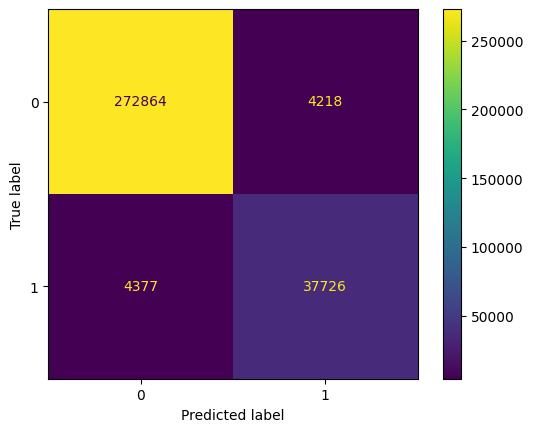

In [46]:
rocdisplay(rf_pred)

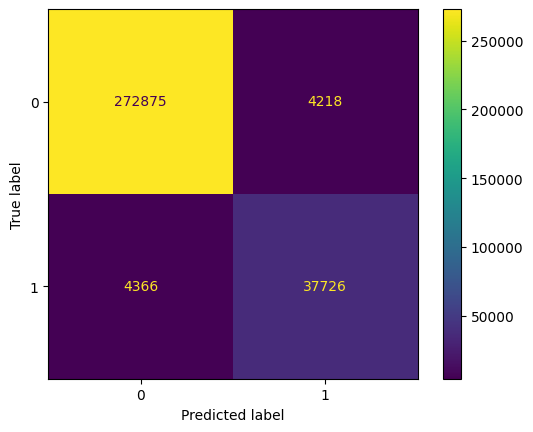

In [47]:
rocdisplay(dt_pred)

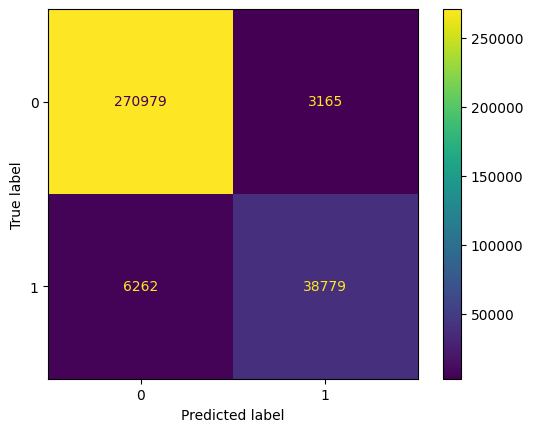

In [48]:
rocdisplay(lr_pred)

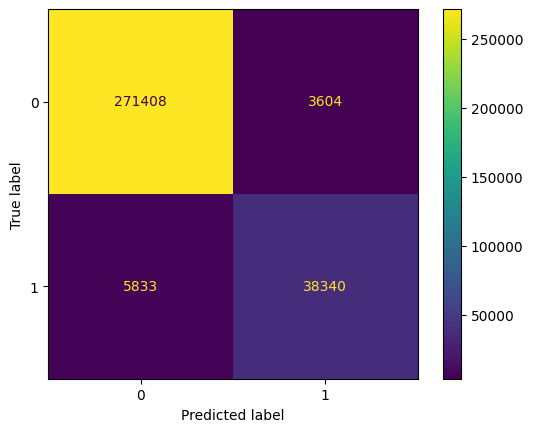

In [49]:
rocdisplay(mlp_pred)

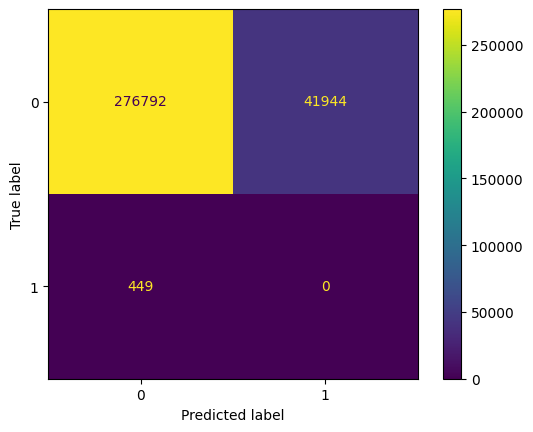

In [60]:
rocdisplay(svc_pred)

Logistic Regression
Random Forest
Decision Tree
MLP Classifier
SVC


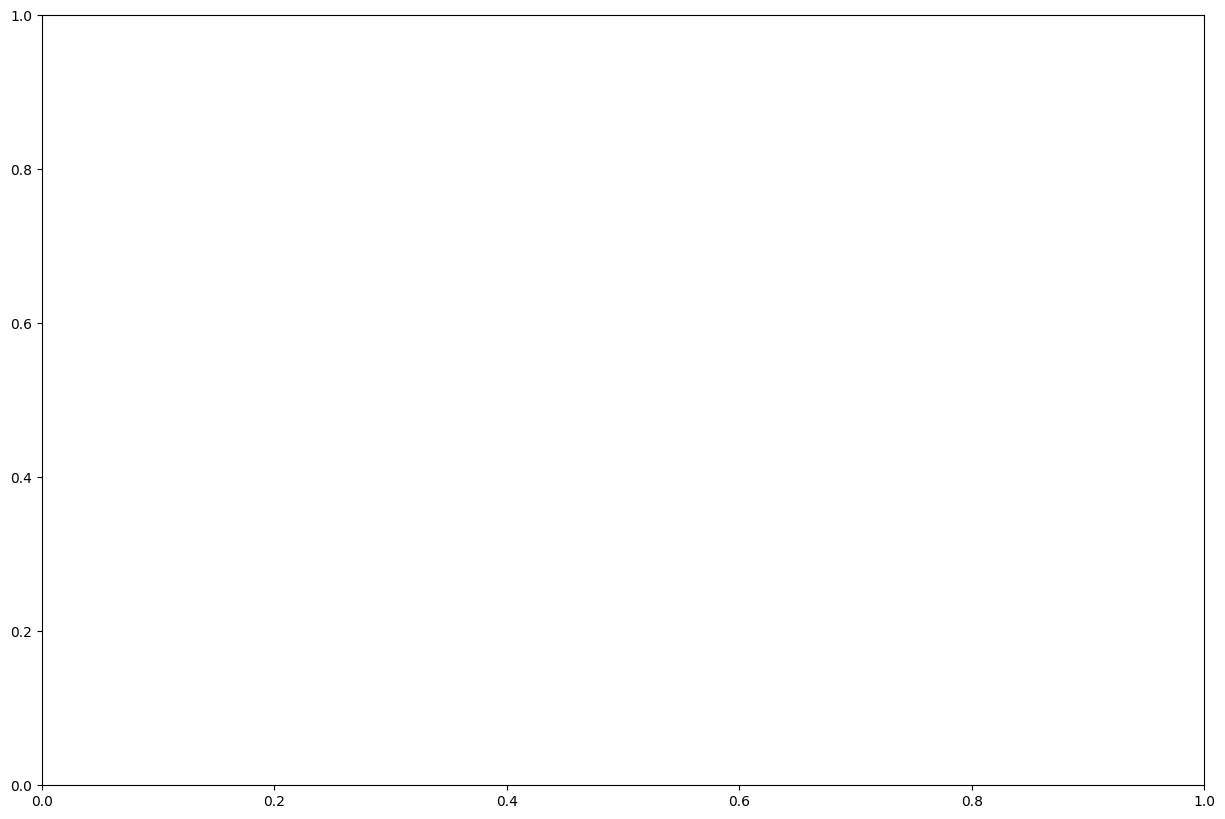

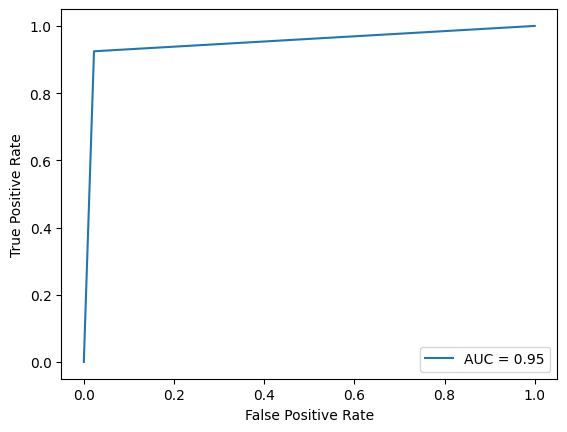

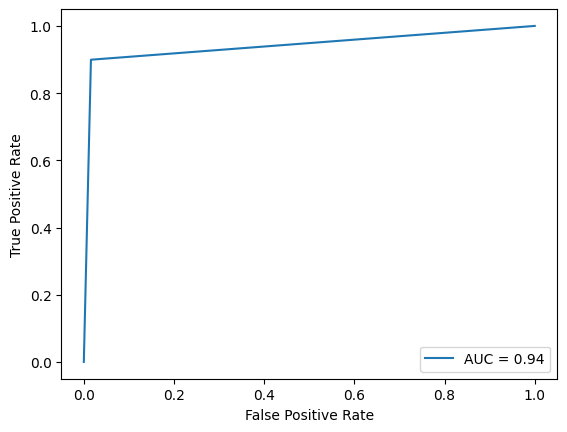

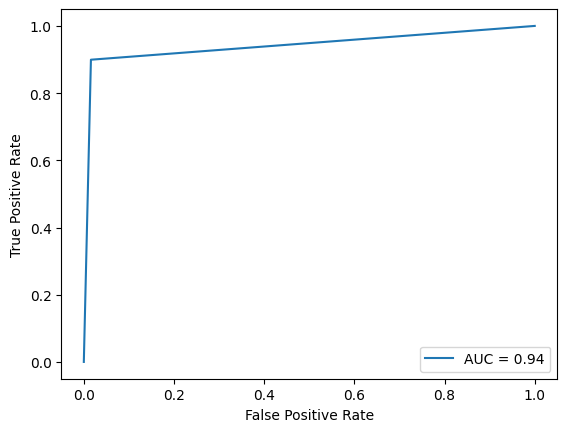

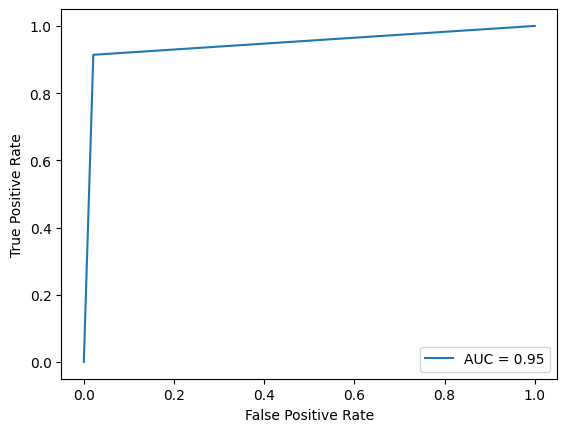

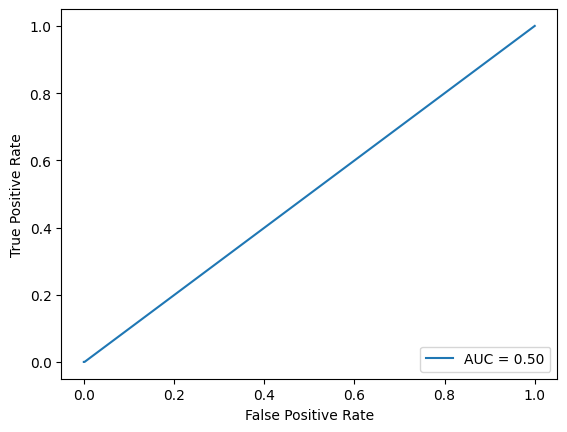

In [68]:
models = [
    ("Logistic Regression", lr, lr_pred),
    ("Random Forest", rf,rf_pred),
    ("Decision Tree", dt,dt_pred),
    ('MLP Classifier', mlp,mlp_pred),
    ('SVC', svc,svc_pred),
]
fig, ax = plt.subplots(figsize=(15,10))
model_displays = {}
for name, pipeline, pred in models:
    print(name)
    fpr, tpr, thresholds = roc_curve(ytest, pred)
    roc_auc = auc(fpr, tpr)
    display = RocCurveDisplay(fpr=fpr, tpr=tpr, roc_auc=roc_auc)
    display.plot()
    plt.legend()